## **Project: Employee Attrition Prediction Pipeline**

### **Problem Statement**

**Objective:** To predict employee attrition in an organization by building an end-to-end ETL pipeline.

**Business Context:** Employee attrition is a significant challenge for companies, leading to increased recruitment and training costs, loss of organizational knowledge, and decreased productivity. Predicting which employees are at risk of leaving allows HR departments to take proactive measures to retain valuable talent.

**Specific Goals:**

*   Identify factors that influence employee attrition.

*   Build and evaluate multiple machine learning models to predict employee attrition.

*   Select the best performing model for deployment.





### **Hypothesis Generation**

**Initial Hypotheses:**

*   Younger employees might have higher attrition rates.

*   Job satisfaction and work-life balance might be significant factors.

*   Employees who work overtime might have higher attrition rates.


**Potential Factors:** Age, Job Role, Department, Job Satisfaction, Work-Life Balance, OverTime, YearsAtCompany, etc.

### **Loading Packages and Data**

**Required Libraries**

In [93]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

**Data Sources**

In [94]:
# Load the Excel file
from google.colab import files
uploaded = files.upload()

file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (3).csv


### **Data Structure and Content**

**Data Overview**

In [95]:
# Get the number of rows and columns
print("Number of rows and columns: ", df.shape, "\n")

# Get the data types of each column
print("Data type of each column:\n", df.dtypes)


Number of rows and columns:  (1470, 35) 

Data type of each column:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours        

**First Glance**

In [96]:
# Display the first few rows of the DataFrame
print("Full Dataset:")
df.head()

Full Dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Summary Statistics**

In [97]:
# View some statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### **Exploratory Data Analysis**

**Data Distribution**

Attrition
No     1233
Yes     237
Name: count, dtype: int64


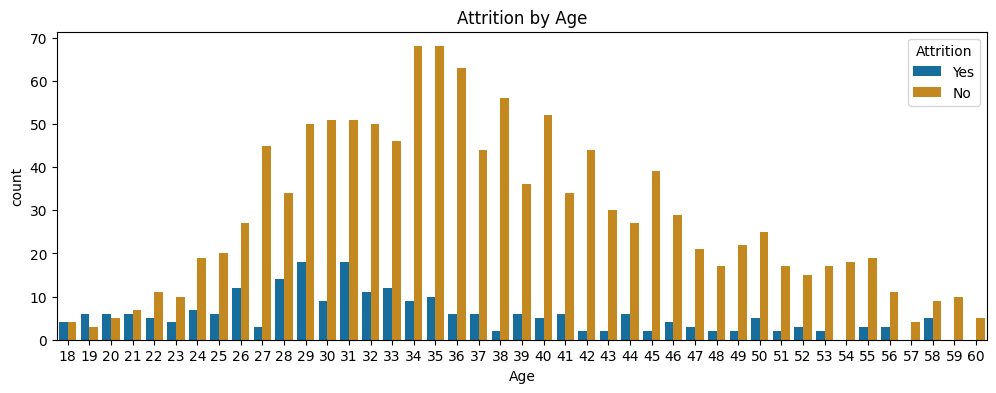

In [98]:
# Get a count of the attrition
print(df['Attrition'].value_counts())

# Show attrition by age
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')
plt.title('Attrition by Age')
plt.show()

In [99]:
# Display the data types and unique values of the columns
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ' : ' + str(df[column].unique()))
    print(df[column].value_counts())
    print('_______________________________________________________________________________')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
_______________________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
_______________________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
_______________________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
_______

**Outliers**

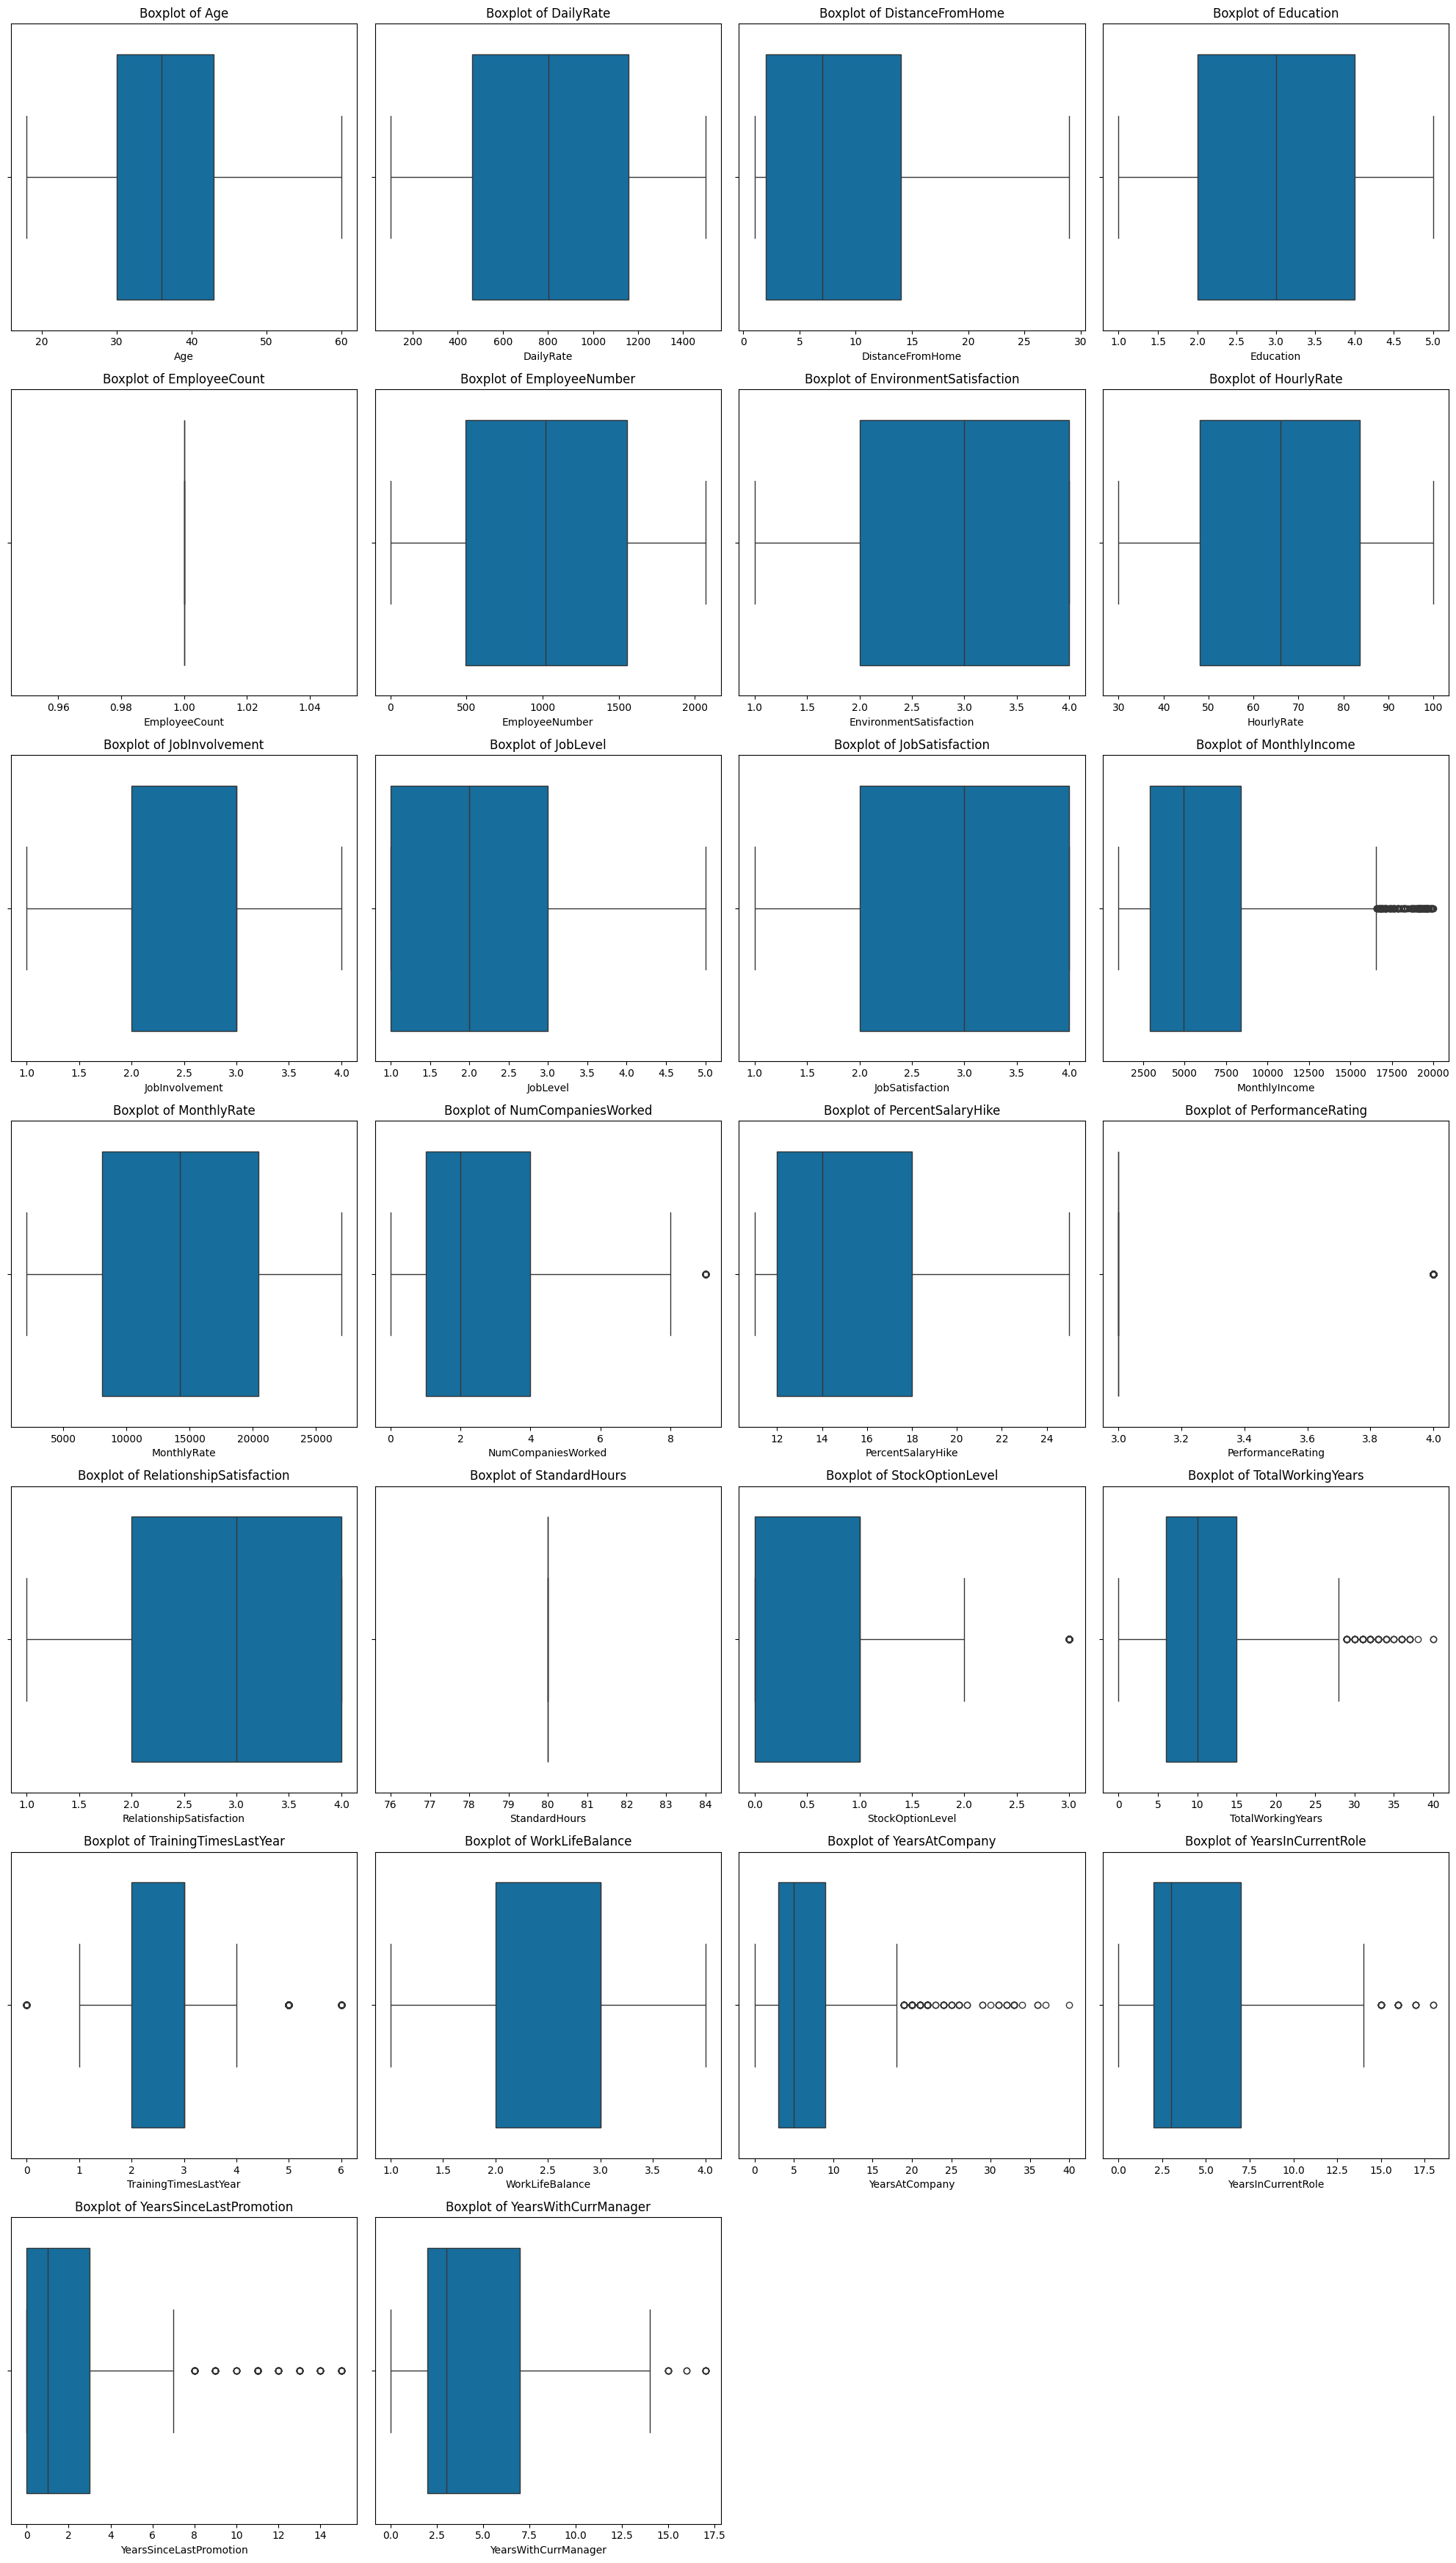

In [100]:
# Boxplots to identify and visualize outliers in numerical variables
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for subplots
num_columns = len(numerical_columns)
num_rows = (num_columns // 4) + 1

# Create subplots dynamically
plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(x=df[column], palette='colorblind')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()



### **Univariate Analysis**

**Numerical Variables**

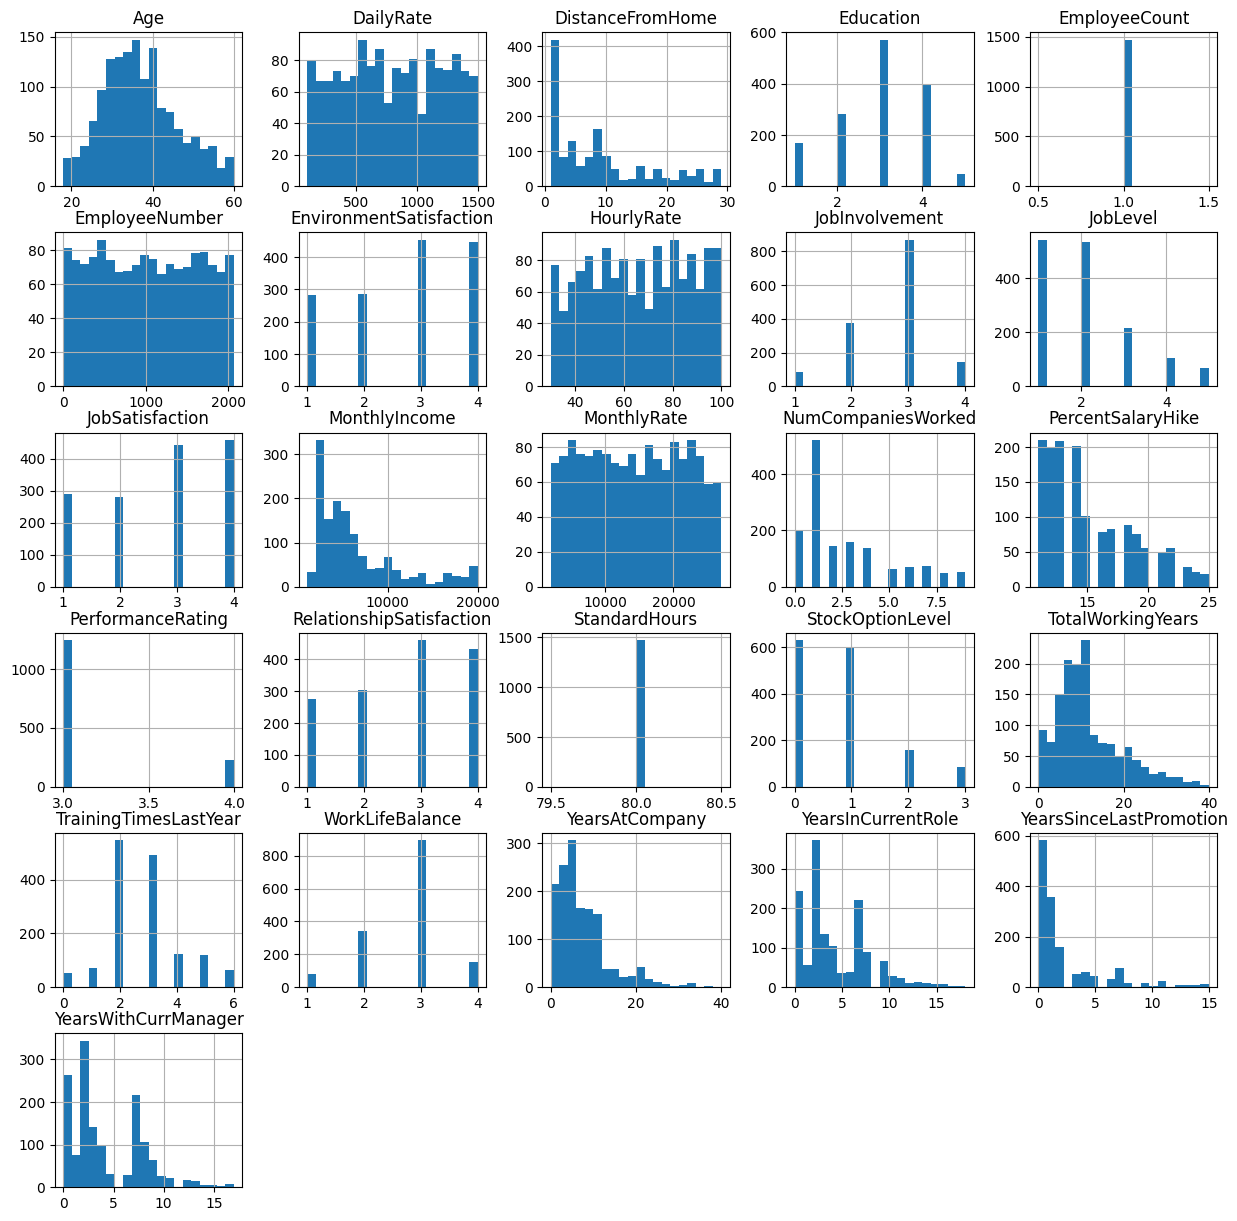

In [101]:
# Analyze and visualize the distribution of numerical variables
df.hist(figsize=(15, 15), bins=20)
plt.show()

**Categorical Variables**

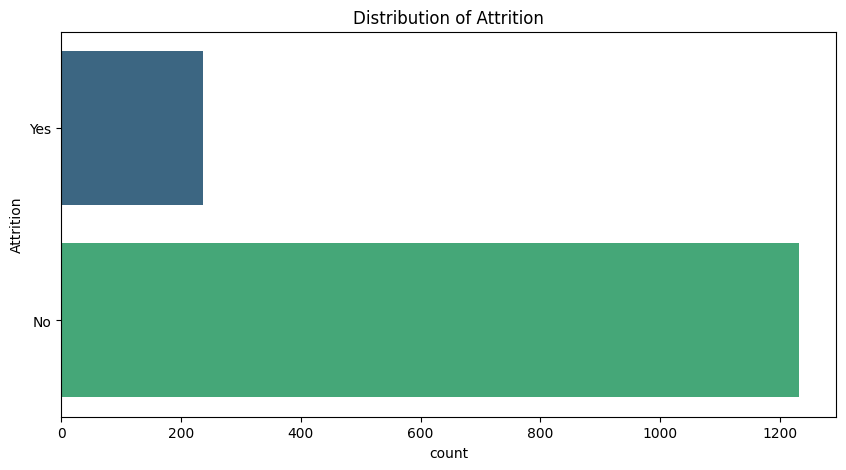

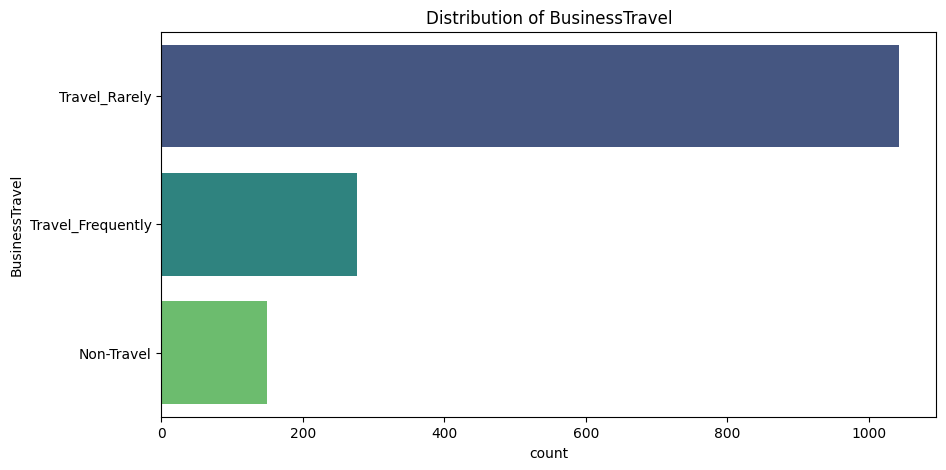

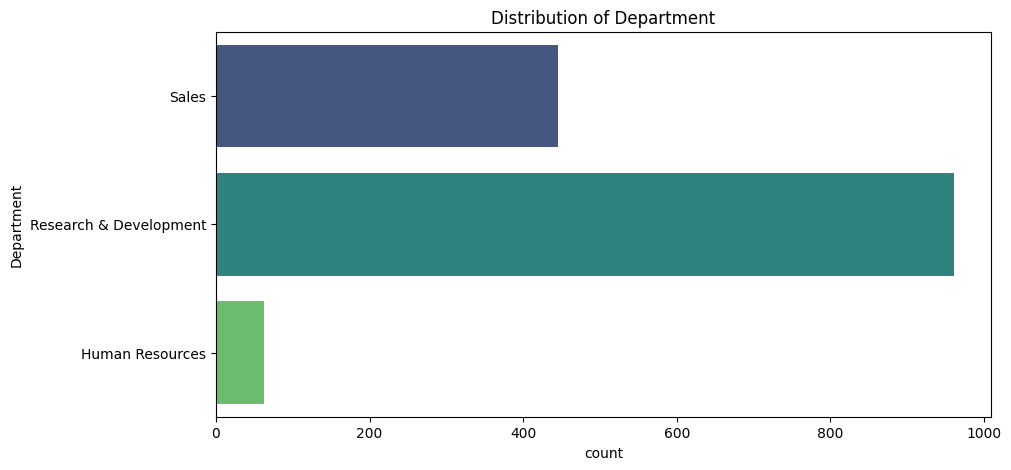

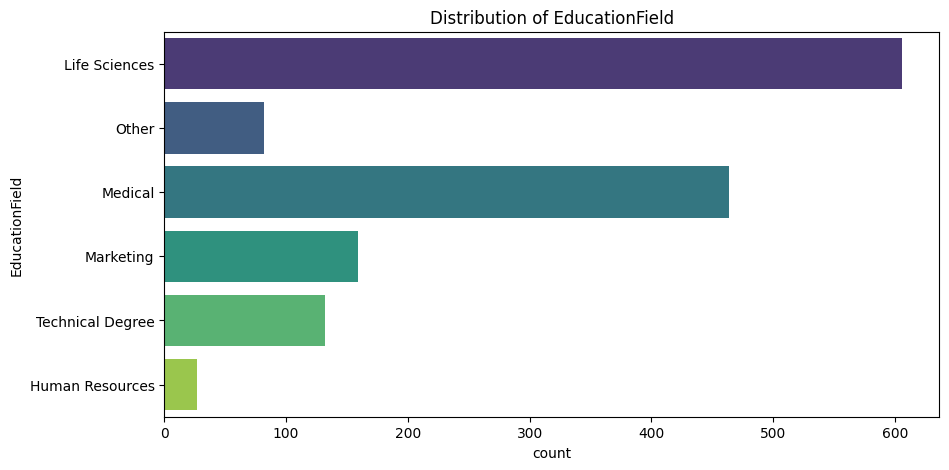

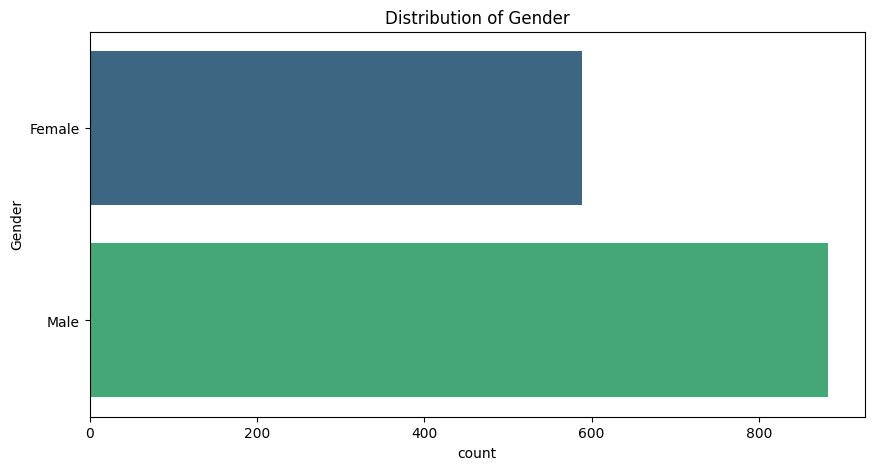

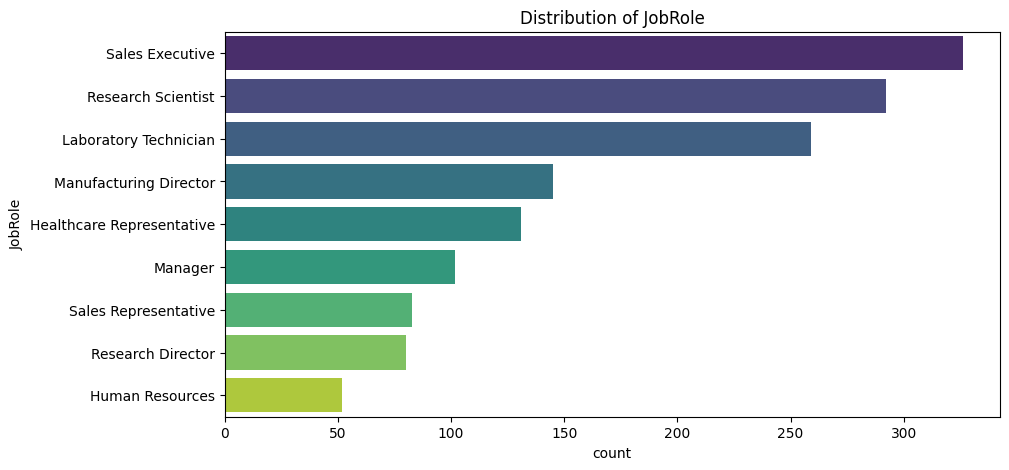

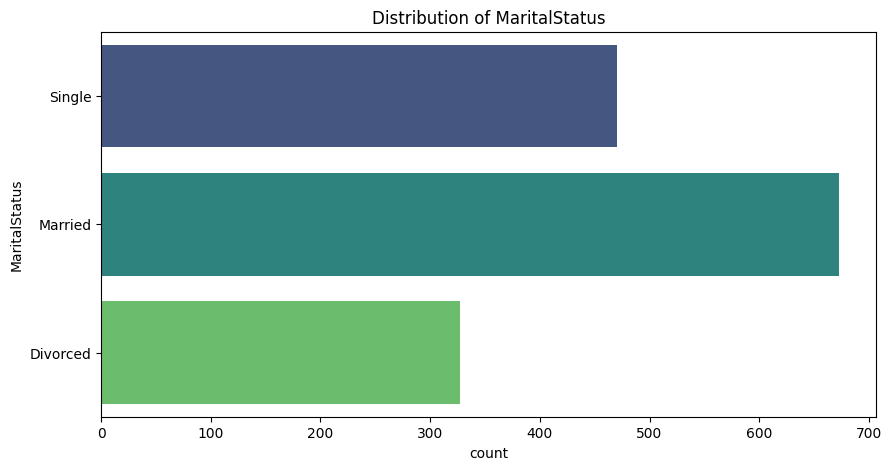

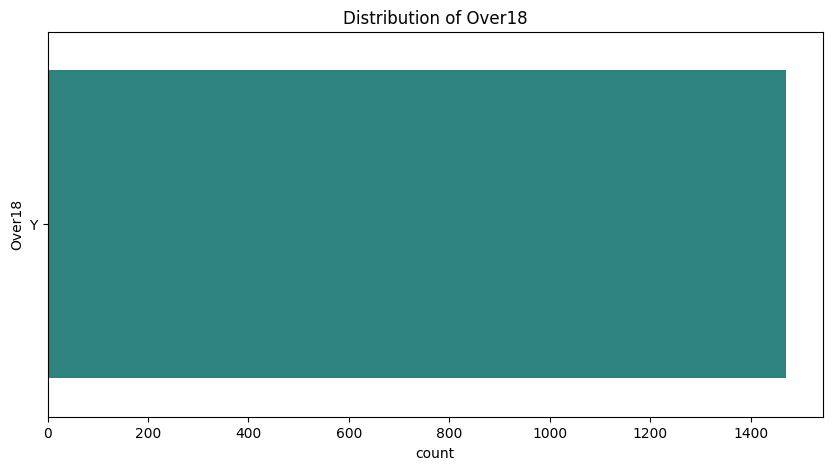

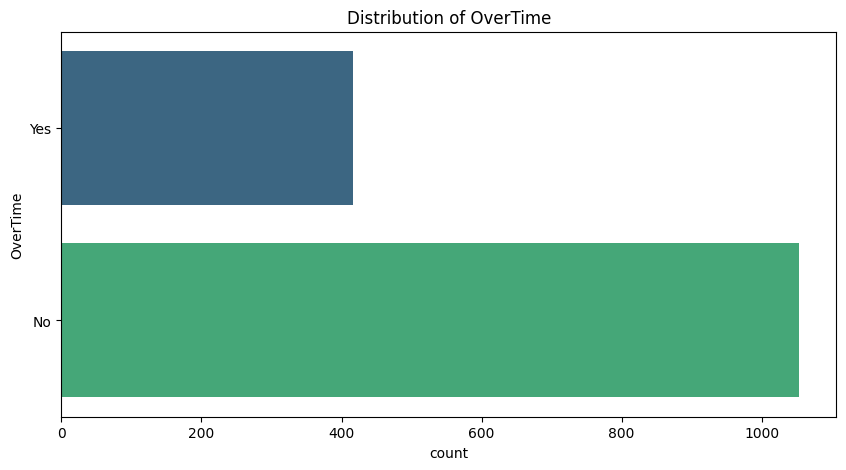

In [102]:
# Analyze and visualize the distribution of categorical variables
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.show()

### **Bivariate Analysis**

**Relationships**

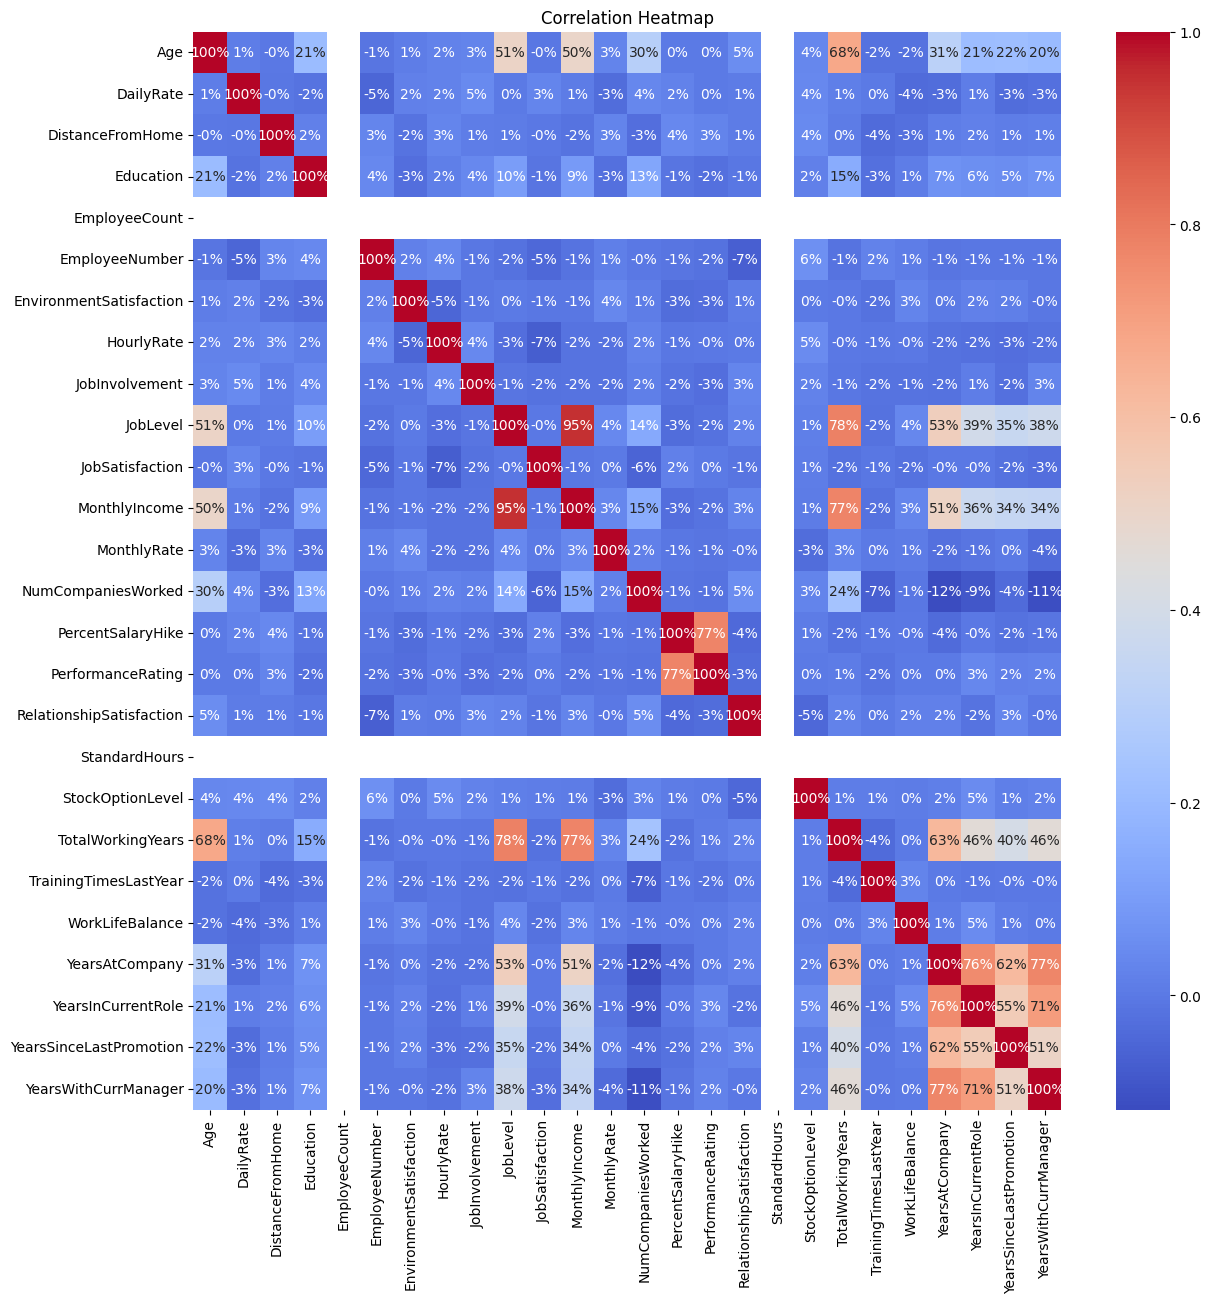

In [103]:
# Relationships between pairs of variables (e.g., correlation heatmap)
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 14))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.0%', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Target Variable**

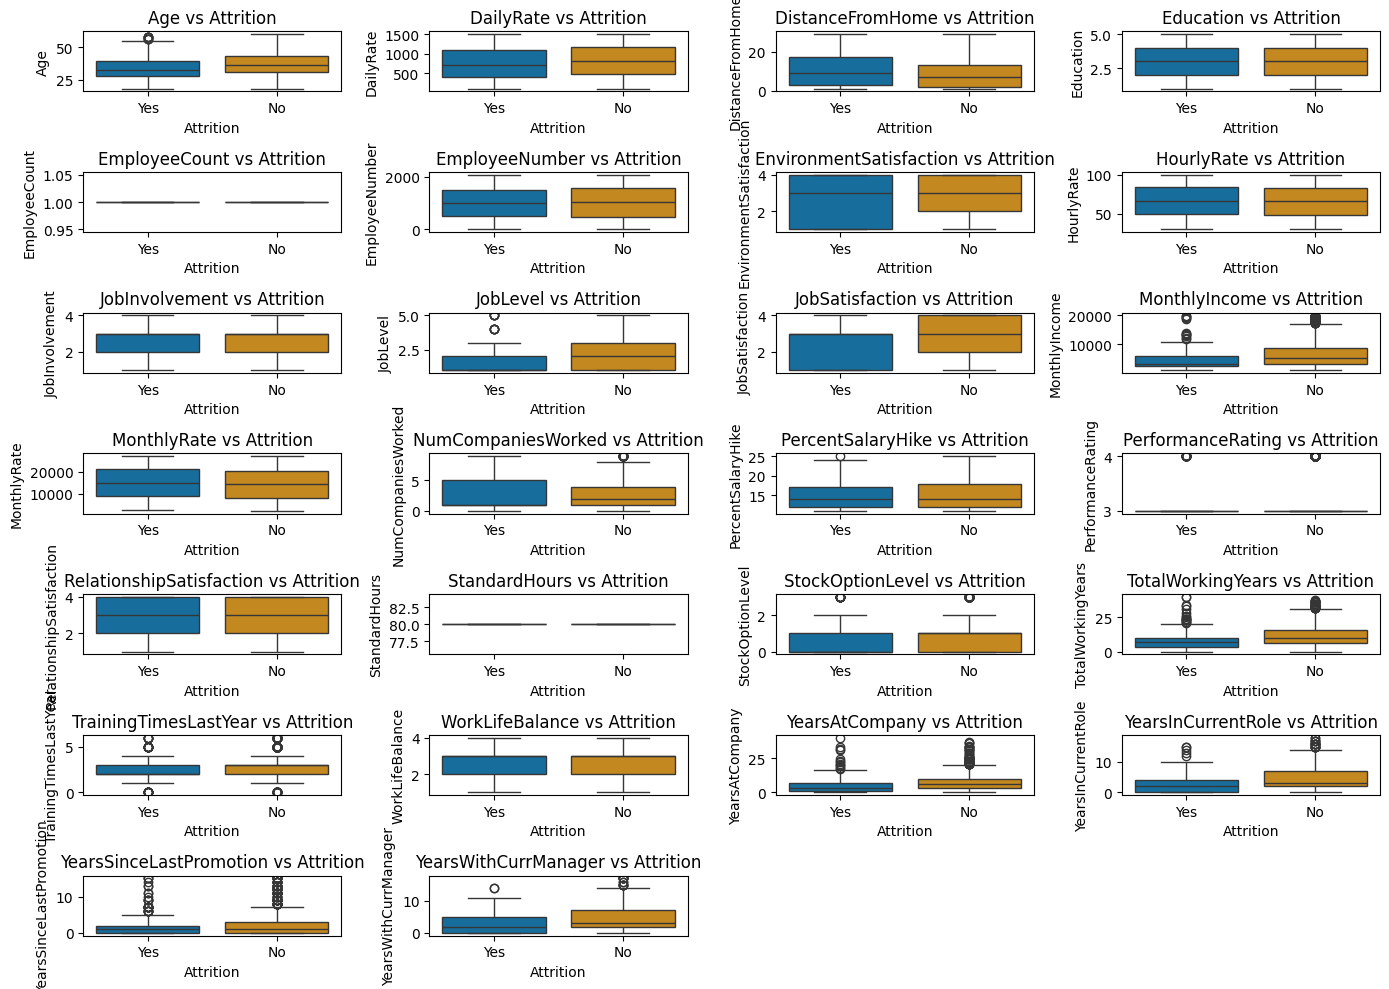

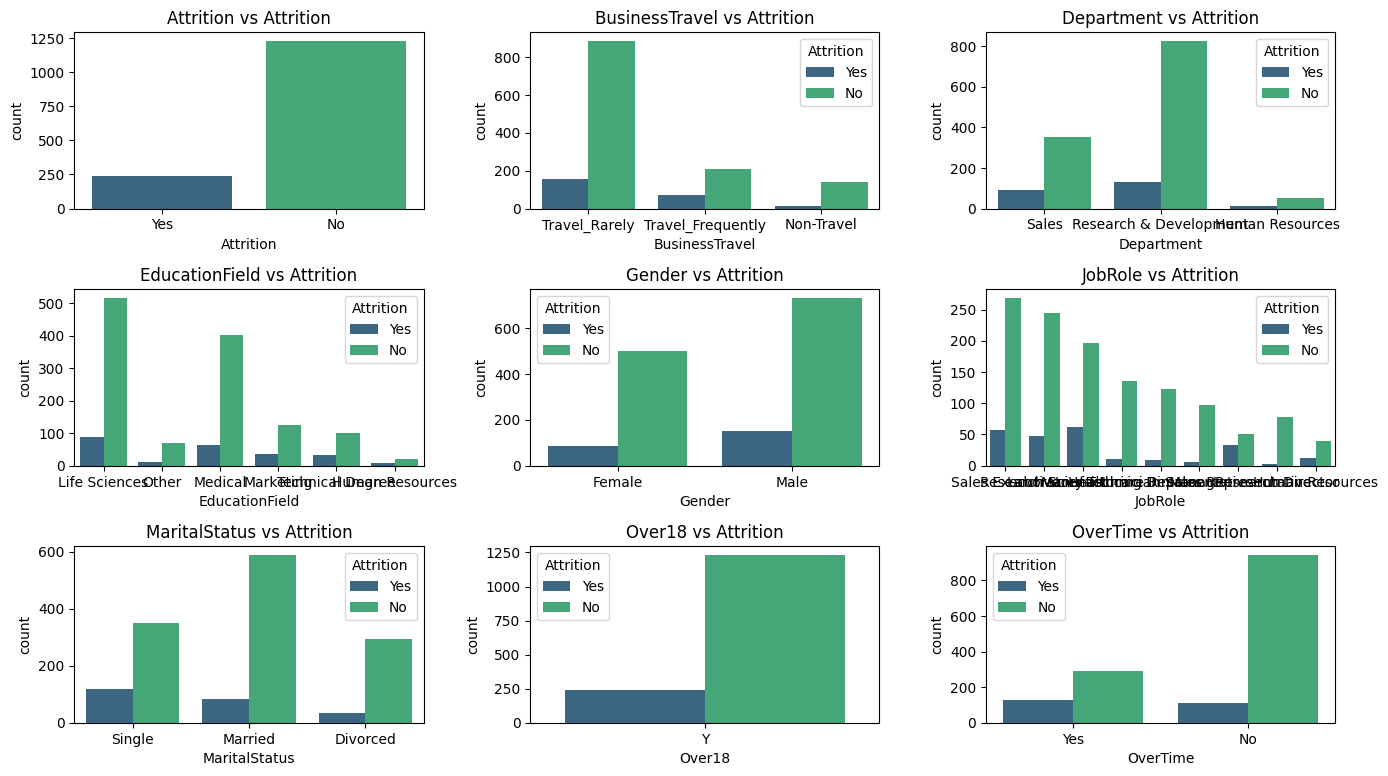

In [104]:
# Analyze how numerical variables relate to the target variable (Attrition)
plt.figure(figsize=(14, 10))

# Calculate the number of rows needed based on the number of numerical columns
num_columns = len(numerical_df.columns) - 1  # excluding 'Attrition'
num_rows = (num_columns // 4) + 1

for i, column in enumerate(numerical_df.columns, 1):
    if column != 'Attrition':
        plt.subplot(num_rows, 4, i)
        sns.boxplot(x=df['Attrition'], y=df[column], palette='colorblind')
        plt.title(f'{column} vs Attrition')

plt.tight_layout()
plt.show()

# Analyze how categorical variables relate to the target variable (Attrition)
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows needed based on the number of categorical columns
num_columns = len(categorical_columns)
num_rows = (num_columns // 3) + 1

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(x=column, hue='Attrition', data=df, palette='viridis')
    plt.title(f'{column} vs Attrition')

plt.tight_layout()
plt.show()


### **Missing Value Treatment**

In [105]:
# Get a count of the empty values for each column
print(df.isna().sum())
print("\n")

# Check for any missing / null values in the data set
print(df.isnull().values.any())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the data set. Hence, imputation strategy is not required.

### **Feature Engineering**

**New Features**

In [106]:
# Creating a new feature 'Age_Years' based on the existing 'Age' column
df['Age_Years'] = df['Age']

# Displaying the data frame with the new feature
print("DataFrame with new feature 'Age_Years':")
df.head()

DataFrame with new feature 'Age_Years':


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,41
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,49
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,37
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,33
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,27


**Feature Transformation**

In [107]:
# Apply log transformation to positively skewed numerical features (example: MonthlyIncome)
df['Log_MonthlyIncome'] = np.log(df['MonthlyIncome'] + 1)

# Apply Standard Scaling to numerical features
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Displaying the data frame after transformations
print("DataFrame after feature transformations:")
df.head()


DataFrame after feature transformations:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years,Log_MonthlyIncome
0,0.446350,Yes,Travel_Rarely,0.742527,Sales,-1.010909,-0.891688,Life Sciences,0.0,-1.701283,...,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0.446350,0.219493
1,1.322365,No,Travel_Frequently,-1.297775,Research & Development,-0.147150,-1.868426,Life Sciences,0.0,-1.699621,...,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1.322365,-0.014600
2,0.008343,Yes,Travel_Rarely,1.414363,Research & Development,-0.887515,-0.891688,Other,0.0,-1.696298,...,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0.008343,-1.366318
3,-0.429664,No,Travel_Frequently,1.461466,Research & Development,-0.764121,1.061787,Life Sciences,0.0,-1.694636,...,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.429664,-0.868626
4,-1.086676,No,Travel_Rarely,-0.524295,Research & Development,-0.887515,-1.868426,Medical,0.0,-1.691313,...,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-1.086676,-0.604032


### **Encoding Categorical Variables**

In [108]:
# Categorical variables that need encoding
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


### **Label Encoding**

In [109]:
# Apply label encoding to ordinal categorical variables
labelencoder = LabelEncoder()
df['Attrition'] = labelencoder.fit_transform(df['Attrition'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

### **One Hot Encoding**

In [110]:
# Apply one hot encoding to nominal categorical variables
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=categorical_cols)

### **Preprocessing Data**

**Scaling**

In [111]:
# Drop unnecessary columns
df = df.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis=1)

# Encode remaining categorical variables
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Scaling numerical features
scaler = StandardScaler()
X = df.drop(columns=['Attrition'])
Y = df['Attrition']
X_scaled = scaler.fit_transform(X)

**Splitting**

In [112]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=0)

### **Modeling**

**Model Selection**

In [113]:
# Initialize models
logistic_regression = LogisticRegression(random_state=0)
decision_tree = DecisionTreeClassifier(random_state=0)
random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
gradient_boosting = GradientBoostingClassifier(random_state=0)
support_vector_machine = SVC(probability=True, random_state=0)

**Training**

In [114]:
# Train each model
logistic_regression.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
gradient_boosting.fit(X_train, Y_train)
support_vector_machine.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

**Evaluation**

In [115]:
def evaluate_model(model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Classification Report': class_report
    }

# Initialize a dictionary to store the results
results = {}

# Evaluate each model and store the results
results['Logistic Regression'] = evaluate_model(logistic_regression, X_test, Y_test)
results['Decision Tree'] = evaluate_model(decision_tree, X_test, Y_test)
results['Random Forest'] = evaluate_model(random_forest, X_test, Y_test)
results['Gradient Boosting'] = evaluate_model(gradient_boosting, X_test, Y_test)
results['Support Vector Machine'] = evaluate_model(support_vector_machine, X_test, Y_test)

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).transpose()

# Print the results DataFrame
print(results_df)

# Print classification reports for each model
for model, result in results.items():
    print(f"\nClassification Report for {model}:\n")
    print(pd.DataFrame(result['Classification Report']).transpose())

                        Accuracy Precision    Recall  F1 Score   ROC AUC  \
Logistic Regression     0.888587  0.793103  0.396552  0.528736  0.863737   
Decision Tree           0.779891  0.311475  0.327586  0.319328  0.596051   
Random Forest           0.861413  0.769231  0.172414   0.28169  0.677753   
Gradient Boosting        0.88587  0.807692  0.362069       0.5  0.793826   
Support Vector Machine  0.872283  0.923077  0.206897  0.338028   0.84188   

                             Confusion Matrix  \
Logistic Regression      [[304, 6], [35, 23]]   
Decision Tree           [[268, 42], [39, 19]]   
Random Forest            [[307, 3], [48, 10]]   
Gradient Boosting        [[305, 5], [37, 21]]   
Support Vector Machine   [[309, 1], [46, 12]]   

                                                    Classification Report  
Logistic Regression     {'0': {'precision': 0.8967551622418879, 'recal...  
Decision Tree           {'0': {'precision': 0.8729641693811075, 'recal...  
Random Forest       

**Tuning**

In [116]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Tune Random Forest
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=50, cv=3, random_state=0, n_jobs=-1, scoring='accuracy')
random_search_rf.fit(X_train, Y_train)

# Tune Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gradient_boosting, param_distributions=param_grid_gb, n_iter=50, cv=3, random_state=0, n_jobs=-1, scoring='accuracy')
random_search_gb.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0, scoring='accuracy')

**Validation**

In [117]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the best models found through hyperparameter tuning
best_rf = random_search_rf.best_estimator_
best_gb = random_search_gb.best_estimator_

# Perform cross-validation
cv_scores_rf = cross_val_score(best_rf, X_train, Y_train, cv=5, scoring='accuracy')
cv_scores_gb = cross_val_score(best_gb, X_train, Y_train, cv=5, scoring='accuracy')

print(f"Random Forest CV Scores: {cv_scores_rf}")
print(f"Random Forest CV Mean Score: {cv_scores_rf.mean()}")

print(f"Gradient Boosting CV Scores: {cv_scores_gb}")
print(f"Gradient Boosting CV Mean Score: {cv_scores_gb.mean()}")

Random Forest CV Scores: [0.85067873 0.86425339 0.84545455 0.84545455 0.84545455]
Random Forest CV Mean Score: 0.850259152612094
Gradient Boosting CV Scores: [0.85972851 0.85972851 0.84545455 0.86363636 0.84090909]
Gradient Boosting CV Mean Score: 0.8538914027149322


**Final Model Selection**

In [118]:
# Based on cross-validation scores, select the best model
if cv_scores_rf.mean() > cv_scores_gb.mean():
    final_model = best_rf
    print("Final Model Selected: Random Forest")
else:
    final_model = best_gb
    print("Final Model Selected: Gradient Boosting")

# Train the final model on the entire dataset
final_model.fit(X_scaled, Y)

# Save the final model for future use
import joblib
joblib.dump(final_model, 'final_model.pkl')

Final Model Selected: Gradient Boosting


['final_model.pkl']